In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors

# County Election Data

In [2]:
# close election county data
county_data = pd.read_csv('data/county_data.csv')
county_data.head()

,code,county,state,unempl_rate,hs_rate,median_age,growth,per_cap_income,college_rate,hh_income,poverty_rate,labor_force,households,population,pop_density,white_rate,hisp_rate,close_elect
0,1001,Autauga,AL,3.9,87.6,37.8,1.7,39721.0,24.6,54487.0,13.5,25909.0,20800.0,55504.0,91.8,0.762305,0.025512,0
1,1003,Baldwin,AL,4.0,90.0,42.3,16.7,41286.0,29.5,56460.0,11.7,91567.0,75149.0,212628.0,114.6,0.810999,0.040973,0
2,1005,Barbour,AL,5.9,73.8,38.7,-8.0,31788.0,12.9,32884.0,29.9,8236.0,9122.0,25270.0,31.0,0.491888,0.045390,0
3,1007,Bibb,AL,4.4,80.7,40.2,-1.1,29264.0,12.0,43079.0,20.1,8506.0,7048.0,22668.0,36.8,0.766278,0.022146,0
4,1009,Blount,AL,4.0,80.0,40.8,1.2,31470.0,13.0,47213.0,14.1,24494.0,20619.0,58013.0,88.9,0.949322,0.086808,0


In [3]:
# zero close counties in AK (can be excluded from plot)
county_data[(county_data['state'] == 'AK') & (county_data['close_elect'] == 1)]

,code,county,state,unempl_rate,hs_rate,median_age,growth,per_cap_income,college_rate,hh_income,poverty_rate,labor_force,households,population,pop_density,white_rate,hisp_rate,close_elect


In [4]:
# zero close counties in HI (can be excluded from plot)
county_data[(county_data['state'] == 'HI') & (county_data['close_elect'] == 1)]

,code,county,state,unempl_rate,hs_rate,median_age,growth,per_cap_income,college_rate,hh_income,poverty_rate,labor_force,households,population,pop_density,white_rate,hisp_rate,close_elect


In [5]:
# drop AK and HI
county_data = county_data[~(county_data['state'] == 'AK') & ~(county_data['state'] == 'HI')]

In [6]:
# add leading zeros
county_data['code'] = county_data['code'].apply(lambda x: '{0:0>5}'.format(x))

In [7]:
len(county_data)

3111

# County Geo Data

In [8]:
county_geo = gpd.read_file('data/cb_2018_us_county_500k/cb_2018_us_county_500k.shp')
county_geo.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."


In [9]:
# filter out territories, Alaska and Hawaii
excl_list = ['02', '15', '60', '66', '69', '72', '78']
county_geo = county_geo[~county_geo['STATEFP'].isin(excl_list)].copy()

In [10]:
len(county_geo)

3108

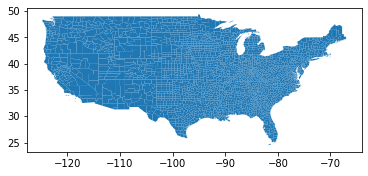

In [11]:
county_geo.plot();

# Combine Election and Geo Data

In [12]:
# add election data to geo dataframe
merged_df = county_geo.set_index('GEOID').join(county_data.set_index('code'))
merged_df.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,geometry,county,...,college_rate,hh_income,poverty_rate,labor_force,households,population,pop_density,white_rate,hisp_rate,close_elect
GEOID,,,,,,,,,,,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",Ballard,...,15.3,45074.0,16.2,3650.0,3252.0,8039.0,33.4,0.962931,0.011942,0.0
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",Bourbon,...,17.8,46231.0,17.6,9921.0,8043.0,20029.0,69.0,0.901543,0.066254,0.0
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",Butler,...,10.4,41701.0,17.8,5257.0,5153.0,12831.0,29.8,0.963916,0.034214,0.0
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",Estill,...,9.2,33839.0,27.3,5383.0,5622.0,14277.0,58.0,0.988303,0.002802,0.0
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",Fleming,...,12.7,38860.0,21.2,6159.0,5730.0,14446.0,41.2,0.969265,0.011837,0.0


In [13]:
len(merged_df)

3108

In [14]:
# nans
merged_df['close_elect'].unique()

array([ 0.,  1., nan])

In [15]:
# fill nans with 0
merged_df['close_elect'] = merged_df['close_elect'].fillna(0)

In [16]:
# election counties missing from geo df
county_data[~county_data['code'].isin(county_geo['GEOID'])]

,code,county,state,unempl_rate,hs_rate,median_age,growth,per_cap_income,college_rate,hh_income,poverty_rate,labor_force,households,population,pop_density,white_rate,hisp_rate,close_elect
329,12025,Dade,FL,4.603544,85.804087,41.023914,0.769847,40722.920773,20.785089,49510.4106,15.877203,50815.113985,37301.244572,103601.700422,259.021308,0.834376,0.089015,0
1650,30113,Yellowstone Nat Park,MT,4.603544,85.804087,41.023914,0.769847,40722.920773,20.785089,49510.4106,15.877203,50815.113985,37301.244572,103601.700422,259.021308,0.834376,0.089015,0
2414,46113,Shannon,SD,4.603544,85.804087,41.023914,0.769847,40722.920773,20.785089,49510.4106,15.877203,50815.113985,37301.244572,103601.700422,6.500000,0.834376,0.089015,0
2913,51515,Bedford City,VA,4.603544,85.804087,41.023914,0.769847,40722.920773,20.785089,49510.4106,15.877203,50815.113985,37301.244572,103601.700422,904.600000,0.834376,0.089015,0
2918,51560,Clifton Forge City,VA,4.603544,85.804087,41.023914,0.769847,40722.920773,20.785089,49510.4106,15.877203,50815.113985,37301.244572,103601.700422,259.021308,0.834376,0.089015,0
2946,51780,South Boston City,VA,4.603544,85.804087,41.023914,0.769847,40722.920773,20.785089,49510.4106,15.877203,50815.113985,37301.244572,103601.700422,259.021308,0.834376,0.089015,0


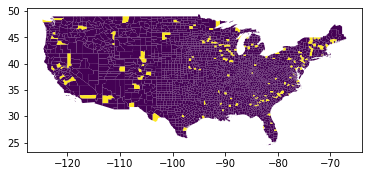

In [17]:
merged_df.plot(column='close_elect')

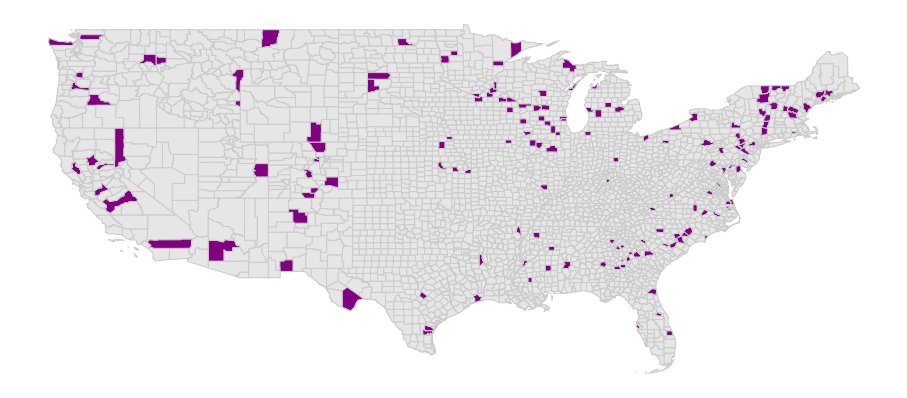

In [22]:
fig, ax = plt.subplots(1, figsize=(16, 12))
plt.axis('off')
cmap = colors.ListedColormap(['#E6E6E6', 'purple'])
merged_df.plot(column='close_elect', cmap=cmap, ax=ax, edgecolor='0.8');
# plt.savefig('model_output/cls_map.png', bbox_inches='tight')